# CONTENT-BASED RECOMMENDER USING KNN


In [339]:
## importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [340]:
df = pd.read_csv("/content/new_df.csv")  ## reading the preprocessed data

In [341]:
df.head() #display few rows of dataset

,movieId,title,genres,imdbId,tmdbId,rating,tag,new_genres,new_title,text,transformed_text
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,3.920930,"pixar,pixar,fun",Adventure Animation Children Comedy Fantasy,Toy Story 1995,Toy Story 1995 Adventure Animation Children C...,toy stori 1995 adventur anim children comedi f...
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,3.431818,"fantasy,magic board game,Robin Williams,game",Adventure Children Fantasy,Jumanji 1995,Jumanji 1995 Adventure Children Fantasy,jumanji 1995 adventur children fantasi
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,3.259615,"moldy,old",Comedy Romance,Grumpier Old Men 1995,Grumpier Old Men 1995 Comedy Romance,grumpier old men 1995 comedi romanc
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,2.357143,NaN,Comedy Drama Romance,Waiting to Exhale 1995,Waiting to Exhale 1995 Comedy Drama Romance,wait exhal 1995 comedi drama romanc
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,3.071429,"pregnancy,remake",Comedy,Father of the Bride Part II 1995,Father of the Bride Part II 1995 Comedy,father bride part ii 1995 comedi


In [342]:
## implementing KNN from scratch using class
class KNN:
    def __init__(self, k=5):
        #k defines number of nearest neighbor
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def recommend(self, X_test):
        # recommend movie using k-nn algorithm
        predictions = []
        for sample in X_test:
            distances = []
            for i in range(len(self.X_train)):
                distance = np.sqrt(np.sum(np.square(sample - self.X_train[i])))  ## calculating the distances
                distances.append((distance, self.y_train[i]))
            distances.sort(key=lambda x: x[0])  ## sorting the distances
            neighbors = distances[:self.k + 1]  ## finding the neighbours
            #classes = [neighbor[1] for neighbor in neighbors]
            #class_distances = [neighbor[0] for neighbor in neighbors]
            # prediction = max(set(classes), key=classes.count)
            predictions.append(neighbors)
        return predictions ## returning the predictions and corresponding distances

In [343]:
# importing countvecotrizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=100,stop_words='english')

In [344]:
#vectorizing text using CountVectorizer
vector = cv.fit_transform(df['transformed_text']).toarray()

In [345]:
vector.shape

(9742, 100)

In [346]:
#Instantiate KNN object
knn = KNN(k = 5)

In [347]:
# extracting movie titles from dataset
title = df["title"].values

In [348]:
# fit train data on model
knn.fit(vector, title)

In [349]:
# recommend function returns recommended movies for given title using knn
def recommend(movieTitle):
  movieId = df[df["title"] == movieTitle]["movieId"].iloc[0] - 1
  movieVector = vector[movieId, :]
  movieVec = movieVector.reshape(1, -1)
  recommendations= knn.recommend(movieVec)
  print(recommendations)
  return recommendations[0][1 :]

In [350]:
#checking the model for "Toy Story (1995)"
recommended_double_list = recommend("Toy Story (1995)")

[[(0.0, 'Toy Story (1995)'), (1.4142135623730951, 'Toy Story 2 (1999)'), (1.7320508075688772, 'Jumanji (1995)'), (1.7320508075688772, 'Balto (1995)'), (1.7320508075688772, 'Indian in the Cupboard, The (1995)'), (1.7320508075688772, 'Gordy (1995)')]]


In [351]:
recommended_lst = [movie[1] for movie in recommended_double_list]
recommended_lst

['Toy Story 2 (1999)',
 'Jumanji (1995)',
 'Balto (1995)',
 'Indian in the Cupboard, The (1995)',
 'Gordy (1995)']

In [352]:
# printing KNN distances for nearest movies
recommended_movies_distance = [movie[0] for movie in recommended_double_list]
recommended_movies_distance

[1.4142135623730951,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772]

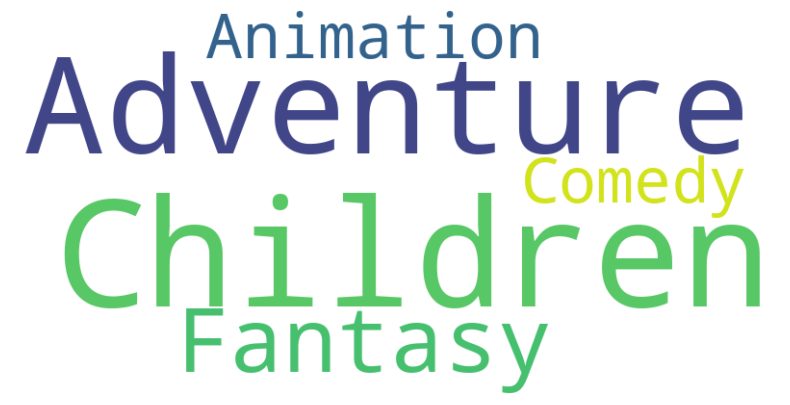

In [353]:
## plotting the genres wordcloud for the recommended movies
from wordcloud import WordCloud
movies = pd.read_csv("movies.csv")
recommendations = recommended_lst

# filtering movies based on recommendations
recommended_movies = movies[movies['title'].isin(recommendations)]
# concatenate all genres into a single string
genres_text = ' '.join(recommended_movies['genres'])

# generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(genres_text)

# display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()